In [ ]:
import numpy as np
import pandas as pd
#matplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline
#applying the deep learning using neural networks from keras library
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113) #loading the dataset

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
#data preparation - feature normalization
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
#building the model : 2 hidden leayer with 64 neurons and one output layer with one neuron
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # using mean square error function as loss function, and mean absolute error as our metric
    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [ ]:
model = build_model()

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=16,
                    epochs=80,
                    verbose = 0)


In [ ]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 11.2816 - mae: 2.4580


In [ ]:
test_mae_score

2.4580087661743164

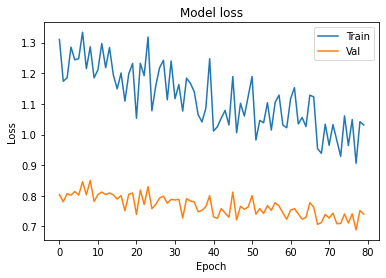

In [ ]:
#visualizing the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()